# Example 4

This example demonstrates Viterbi algorithm

In [1]:
import neuralflow
from neuralflow.gradients import Grads
from neuralflow.viterbi import Viterbi
import numpy as np
import matplotlib.pyplot as plt, matplotlib.gridspec as gridspec

## Step 1: generate data from ramping model

In [2]:
grid = neuralflow.GLLgrid(Np = 8, Ne = 16)
gt_model = neuralflow.model.new_model(
    peq_model = {"model": "linear_pot", "params": {"slope": -0.65}},
    p0_model = {"model": "single_well", "params": {"miu": 200, "xmin": 0}},
    D = 0.56,
    fr_model = [{"model": "linear", "params": {"slope": 50, "bias": 60}}, {"model": "linear", "params": {"slope": -50, "bias": 60}}],
    grid = grid
)

data_generator = neuralflow.SyntheticData(gt_model, 'absorbing')

data, time_bins, diff_traj = data_generator.generate_data(trial_start = 0, trial_end = 100, num_trials = 10)

100%|██████████| 10/10 [00:01<00:00,  9.91it/s]


## Step 2: Apply Viterbi and visualize

Note: for real-data analysis, one would typically optimize a model and use the optimized model and data to run Viterbi and visualize the most likely latent paths. However, for the sake of simplicity, we will use the ground-truth model which was used for data generation.

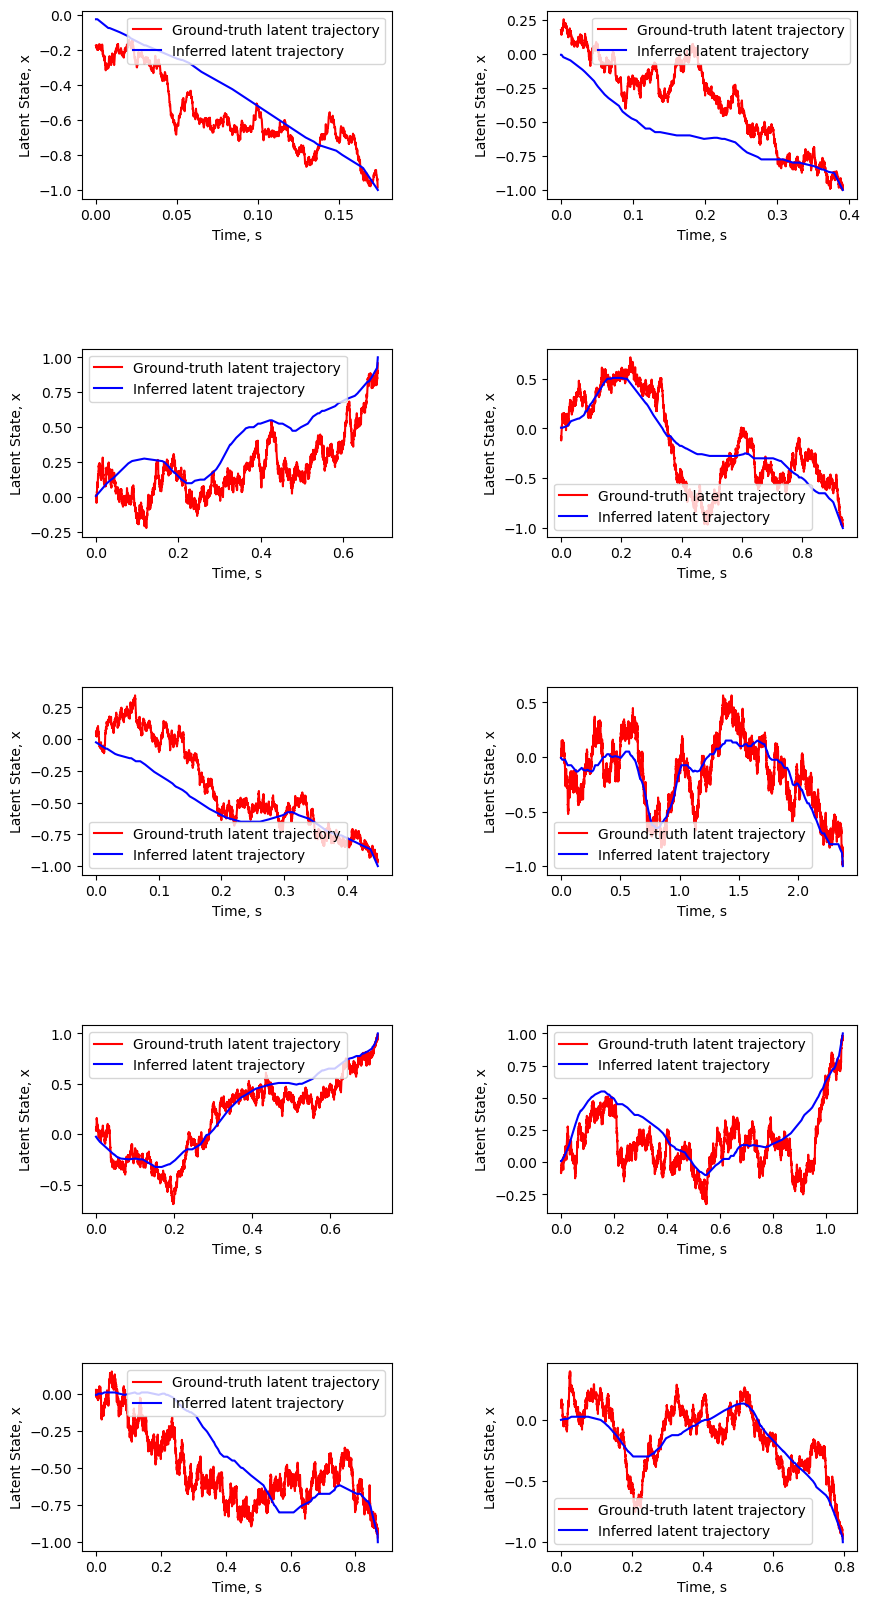

In [3]:
grad = Grads({'Np': 8, 'Ne': 16}, 'absorbing', num_neuron=gt_model.num_neuron)
viterbi = Viterbi(grad)
spike_data = neuralflow.SpikeData(data)
trajectories_vit, _ = viterbi.run_viterbi(spike_data, gt_model)

# Plot
fig=plt.figure(figsize=(10,20))
gs=gridspec.GridSpec(5,2,wspace=0.5,hspace=0.8);
for i in range(10):
    ax = plt.subplot(gs[i//2, i%2])
    plt.plot(time_bins[i], diff_traj[i], color='red', label='Ground-truth latent trajectory')
    # Viterbi infers latent states at the time of the spikes, and also trial start and trial end
    # times. cumsum(data[i][0]) provides all of the spiketimes and trial end time. Since trial
    # start time is at 0, add zero in the beginning of the sequence
    vit_times = np.concatenate(([0], np.cumsum(spike_data.data[i][0])))
    plt.plot(vit_times, trajectories_vit[i], color='#0000FF', label='Inferred latent trajectory')
    plt.xlabel('Time, s')
    plt.ylabel('Latent State, x')
    plt.legend()
    